In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#df = pd.read_feather('/kaggle/input/nos-news-articles-2015-2024oct/NOS_NL_articles_2015_mar_2025.feather') OLD

#read dataset / latest version: sept 2025 
df = pd.read_feather("C:\\Users\\Max van der Slot\\Downloads\\NOS_NL_articles_2015_jul_2025.feather")

# Ensure 'published_time' column is in datetime format
df['published_time'] = pd.to_datetime(df['published_time'])

# Display last three rows
df.tail(3)

,channel,url,type,title,keywords,section,description,published_time,modified_time,image,content
296931,nos,https://nos.nl/artikel/2577138,article,Meer dan 70 verwaarloosde honden weggehaald ui...,"verwaarloosde dieren, Oosterwolde",Regionaal nieuws,De honden zijn naar een opvanglocatie gebracht...,2025-07-31 22:43:35,2025-07-31 22:43:35,https://cdn.nos.nl/image/2025/07/31/1255340/10...,<h1>Meer dan 70 verwaarloosde honden weggehaal...
296932,nos,https://nos.nl/artikel/2577139,article,Vitesse is geen profclub meer: 'Niemand kan ge...,"Vitesse, voetbal",Voetbal,Vitesse is door de uitspraak van de beroepscom...,2025-07-31 22:45:18,2025-07-31 23:19:15,https://cdn.nos.nl/image/2025/08/01/1255453/10...,<h1>Vitesse is geen profclub meer: 'Niemand ka...
296933,nos,https://nos.nl/artikel/2577141,article,Vijf van de zes Nederlandse beachvolleybalkopp...,"EK beachvolleybal, beachvolleybal",Beachvolleybal,Vijf van de zes Nederlandse beachvolleybalkopp...,2025-07-31 23:14:19,2025-07-31 23:14:19,https://cdn.nos.nl/image/2025/07/31/1255347/10...,<h1>Vijf van de zes Nederlandse beachvolleybal...


In [13]:
# Count the number of rows
total_rows = len(df)

# Count the number of rows after filtering on nos-channel (and remove nieuwsuur-articles)
df = df[(df['channel'] == 'nos')]

total_rows_filtered = len(df)

print("Total number of rows:", total_rows, "\nFiltered ('nos' channel): ", total_rows_filtered)

Total number of rows: 296934 
Filtered ('nos' channel):  287018


In [14]:
count_article = df[df['type'] == 'article'].shape[0]
count_liveblog = df[df['type'] == 'liveblog'].shape[0]

print("number of articles: ", count_article)
print("number of liveblogs: ", count_liveblog)

number of articles:  282275
number of liveblogs:  4743


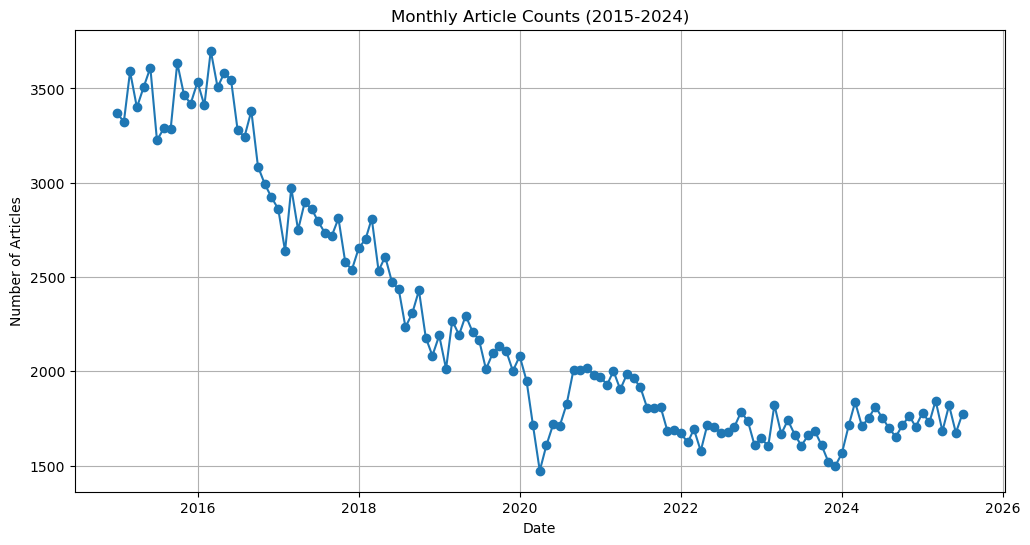

In [15]:
# Extract the year and month from 'published_time' as a new column in YYYY-MM format
df['year_month'] = df['published_time'].dt.to_period('M')

# Count the number of articles per month
monthly_counts = df.groupby('year_month').size()

# Convert to DataFrame for plotting
monthly_counts_df = monthly_counts.reset_index(name='article_count')
monthly_counts_df['year_month'] = monthly_counts_df['year_month'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df['year_month'], monthly_counts_df['article_count'], marker='o')
plt.title("Monthly Article Counts (2015-2024)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

In [16]:
# Define the specific timestamp to filter
specific_time = "2024-10-12 12:06:43"

# Filter the dataframe for the exact published_time and select only the desired columns
row_specific_time = df[df['published_time'] == specific_time][['content']]

# Print the selected columns in a tabular format
print(row_specific_time.to_string(index=False))

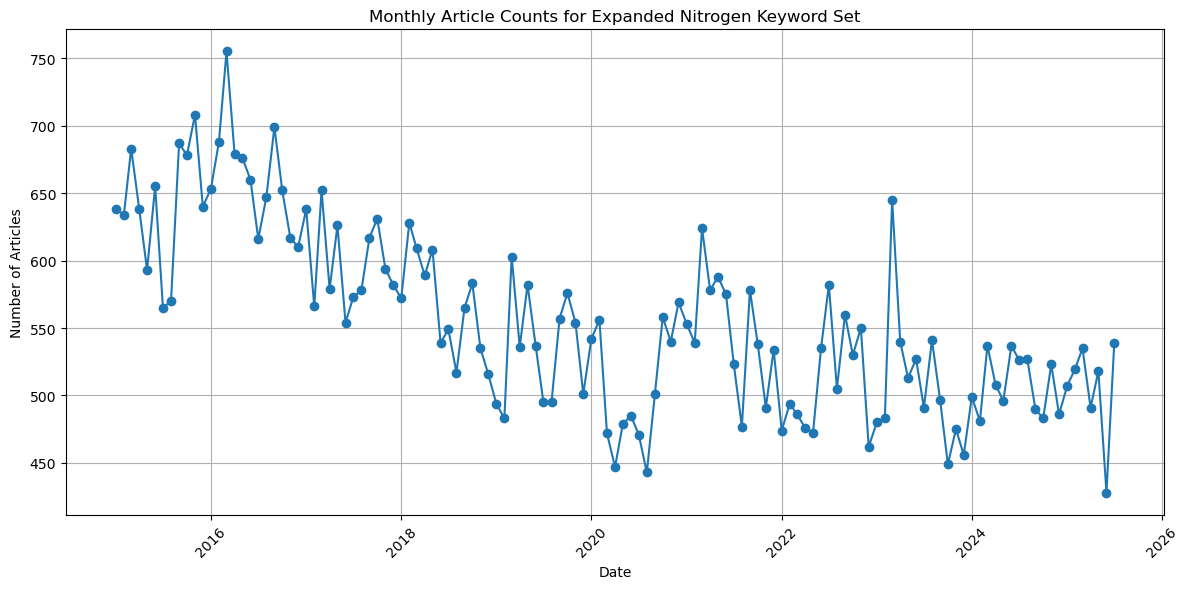

Total matched articles: 70569


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

search_words = [
    "stikstof",
    "stikstofcrisis",
    "stikstofbeleid",
    "stikstofprobleem",
    "stikstofmaatregelen",
    "PAS",
    "Programma Aanpak Stikstof",
    "stikstofnormen",
    "boerenprotest",
    "uitkoopregeling boeren",
    "stikstofreductie",
    "emissiearme stallen"
]

# Maak 1 regex-patroon van alle keywords (OR)
pattern = "|".join(search_words)

# Kolommen waarin je wil zoeken
cols = ["title", "keywords", "section", "description", "content"]

# Filter: match als 1 van de keywords voorkomt in 1 van de kolommen
mask = False
for c in cols:
    mask = mask | df[c].astype(str).str.contains(pattern, case=False, na=False, regex=True)

df_filtered = df[mask].copy()

# Monthly grouping
df_filtered["published_time"] = pd.to_datetime(df_filtered["published_time"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["published_time"])
df_filtered["year_month"] = df_filtered["published_time"].dt.to_period("M")

monthly_counts = df_filtered.groupby("year_month").size()
monthly_counts_df = monthly_counts.reset_index(name="article_count")
monthly_counts_df["year_month"] = monthly_counts_df["year_month"].dt.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts_df["year_month"], monthly_counts_df["article_count"], marker="o", linestyle="-")
plt.title("Monthly Article Counts for Expanded Nitrogen Keyword Set")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total matched articles:", len(df_filtered))
